# Un poco de graficación 3D

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Gráficos y procesamiento sencillo en 2D

### Histogramas en 2D

Así como trabajamos con histogramas de arrays unidimensionales en forma sencilla usando `plt.hist()` o `np.histogram()`, podemos hacerlo de una manera similar trabajando en el plano. Empecemos creando algunos datos

In [3]:
np.random.seed(0)
n = 100000
x = np.r_[np.random.normal(size=n), np.random.normal(loc=3, size=n)]
y = 2.0 + 4.0 * x - x**2 / 5 + 2.0 * \
    np.r_[np.random.normal(size=n), np.random.normal(loc=-3, size=n)]

Acá la notación `r_[]` hace concatenación por filas. Veamos que forma tienen `x` e `y`

In [5]:
x.shape

(200000,)

Para crear el histograma usamos simplemente la función `hist2d`. Que realiza la grilla acorde al argumento `bins` y luego calcula el histograma en dos dimensiones

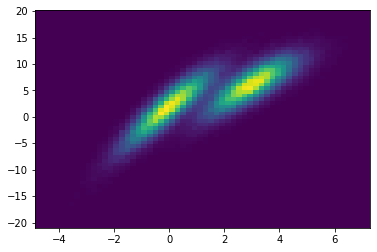

In [6]:
#fig1= plt.figure()
H= plt.hist2d(x, y, bins=60)

Aquí pusimos igual número de "cajas" en cada dimensión. También podemos pasarle un array con distinto número de cajas

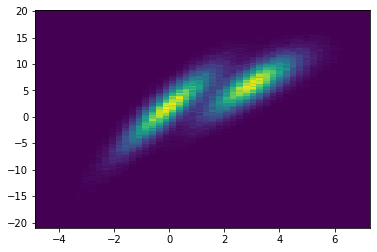

In [7]:
fig1= plt.figure()
H= plt.hist2d(x, y, bins=[50,150])

Por supuesto podemos cambiar el esquema de colores utilizado. Para ello le damos explícitamente el argumento `cmap` especificando el "colormap" deseado:

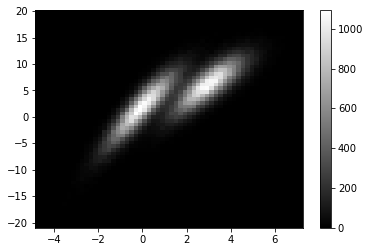

In [8]:
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap='gray')
plt.colorbar();

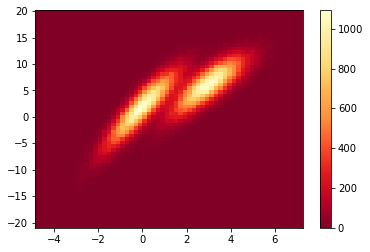

In [5]:
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap=plt.cm.YlOrRd_r)
plt.colorbar();

De la misma manera, si queremos realizarlo en escala logarítmica debemos pasarle una escala de colores adecuada

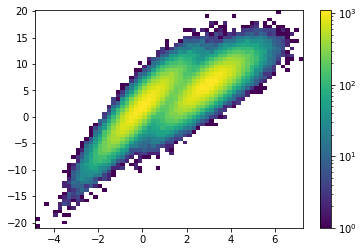

In [10]:
from matplotlib.colors import LogNorm
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, norm=LogNorm())
plt.colorbar();

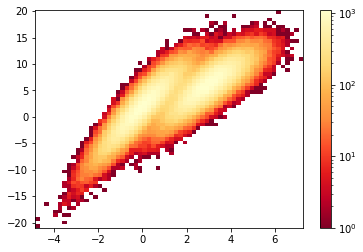

In [11]:
from matplotlib.colors import LogNorm
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap=plt.cm.YlOrRd_r, norm=LogNorm())
plt.colorbar();

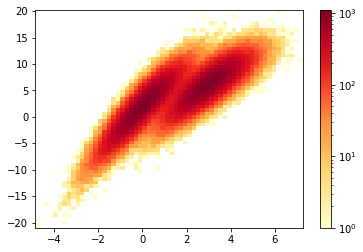

In [12]:
from matplotlib.colors import LogNorm
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap=plt.cm.YlOrRd, norm=LogNorm())
plt.colorbar();

### Histogramas con partición hexagonal

Vemos que `plt.hist()` realiza una partición rectangular del dominio. Puede ser más agradable a la vista realizar una partición en hexágonos. Para ello está la función `plt.hexbin()` 

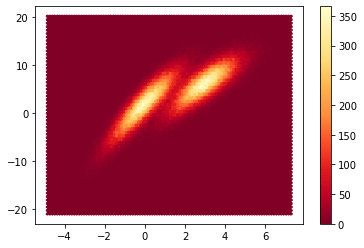

In [13]:
fig1= plt.figure()
plt.hexbin(x, y, cmap=plt.cm.YlOrRd_r)
plt.colorbar();

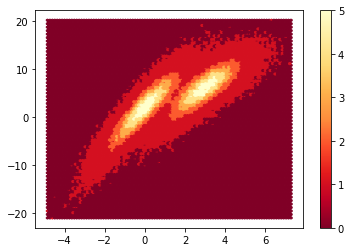

In [14]:
fig1= plt.figure()
plt.hexbin(x, y, bins=6, cmap=plt.cm.YlOrRd_r)
plt.colorbar();

o, en escala logarítmica:

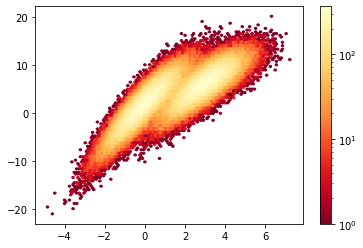

In [15]:
fig1= plt.figure()
plt.hexbin(x, y, bins='log', cmap=plt.cm.YlOrRd_r)
plt.colorbar();

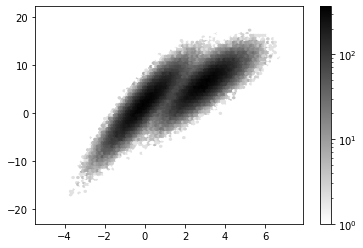

In [16]:
fig1= plt.figure()
plt.hexbin(x, y, bins='log', cmap='gray_r')
plt.colorbar();

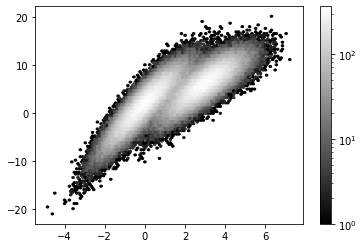

In [17]:
fig1= plt.figure()
plt.hexbin(x, y, bins='log', cmap='gray')
plt.colorbar();

### Gráficos de contornos



In [50]:
H[0].shape, H[1].shape, H[2].shape

((60, 60), (61,), (61,))

In [19]:
H[2]

array([-20.97716804, -20.29168082, -19.60619359, -18.92070637,
       -18.23521914, -17.54973191, -16.86424469, -16.17875746,
       -15.49327024, -14.80778301, -14.12229579, -13.43680856,
       -12.75132133, -12.06583411, -11.38034688, -10.69485966,
       -10.00937243,  -9.3238852 ,  -8.63839798,  -7.95291075,
        -7.26742353,  -6.5819363 ,  -5.89644908,  -5.21096185,
        -4.52547462,  -3.8399874 ,  -3.15450017,  -2.46901295,
        -1.78352572,  -1.09803849,  -0.41255127,   0.27293596,
         0.95842318,   1.64391041,   2.32939763,   3.01488486,
         3.70037209,   4.38585931,   5.07134654,   5.75683376,
         6.44232099,   7.12780822,   7.81329544,   8.49878267,
         9.18426989,   9.86975712,  10.55524434,  11.24073157,
        11.9262188 ,  12.61170602,  13.29719325,  13.98268047,
        14.6681677 ,  15.35365493,  16.03914215,  16.72462938,
        17.4101166 ,  18.09560383,  18.78109106,  19.46657828,
        20.15206551])

In [6]:
x0 = 0.5*(H[1][1:]+ H[1][:-1])
y0 = 0.5*(H[2][1:]+ H[2][:-1])
X, Y = np.meshgrid(x0, y0)
Z = H[0]

In [21]:
X.shape, Y.shape, Z.shape

((60, 60), (60, 60), (60, 60))

In [22]:
np.all(X[0] == X[1])

True

In [23]:
np.all(Y[0] == Y[1])

False

In [24]:
np.all(Y[:,0] == Y[:,2])

True

In [25]:
X[0,:10], X[1,:10]

(array([-4.75096788, -4.54866832, -4.34636877, -4.14406921, -3.94176966,
        -3.7394701 , -3.53717055, -3.33487099, -3.13257144, -2.93027188]),
 array([-4.75096788, -4.54866832, -4.34636877, -4.14406921, -3.94176966,
        -3.7394701 , -3.53717055, -3.33487099, -3.13257144, -2.93027188]))



-------

**Nota:** ¿Qué hace `meshgrid` aquí?

La función `meshgrid` crea matrices de coordenadas en n-dimensiones, basadas en n vectores unidimensionales de coordenadas

Consideremos un caso con vectores más simples:

```python
  x = np.arange(4, dtype='int')
  y = np.arange(4, 7, dtype='int')
  XX, YY = np.meshgrid(x, y)
```

La función `meshgrid` crea pares $(x,y)$ iterando sobre cada valor de $y$ para cada valor de $x$. En este caso para los vectores:

```
  x = [0 1 2 3]
  y = [4 5 6]
```

crea las matrices

```
  XX = [[0 1 2 3]
        [0 1 2 3]
        [0 1 2 3]]
  YY = [[4 4 4 4]
        [5 5 5 5]
        [6 6 6 6]]
```

que contiene todos los pares posibles $(x,y)$, como se ve en la siguiente figura:

```python
  plt.plot(XX, YY, 'x', color='C0')
```

![](figuras/ej_meshgrid.png)

-------



Vamos a usar los datos para hacer los gráficos de contornos

(-12.0, 15.0)

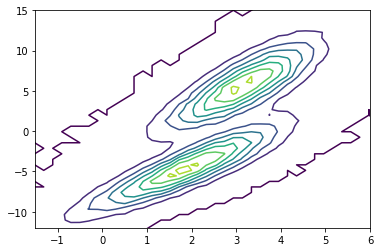

In [26]:
fig1= plt.figure()
CS = plt.contour(X, Y, Z)
plt.xlim((-1.5,6))
plt.ylim((-12,15))

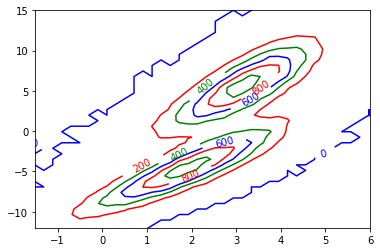

In [27]:
CS = plt.contour(X, Y, Z, 5, colors=('b','r','g'))
plt.clabel(CS, fontsize=10, inline=1)
plt.xlim((-1.5,6))
plt.ylim((-12,15));

También podemos mostrar la imagen con los contornos superpuestos:

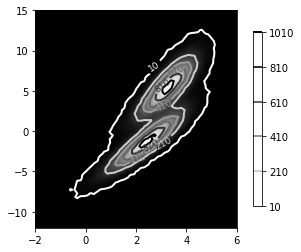

In [28]:
fig1= plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                extent=(-2,6,-12,15), aspect=0.32, cmap=plt.cm.gray)
levels = np.arange(10, 1210, 200)
CS = plt.contour(Z, levels, origin='lower', linewidths=2,
                 extent=(-2,6,-12,15), cmap=plt.cm.gray_r )
plt.clabel(CS, fontsize=9, inline=1)
CB = plt.colorbar(CS, shrink=0.8)

### Superficies y contornos

#### Superficies

Para realizar gráficos "realmente" en 3D debemos importar `Axes3D`

In [29]:
from mpl_toolkits.mplot3d import Axes3D
#plt.style.use('classic')

/var/folders/b8/sx4v8rw56mv_mzsdqmfxz7z00000gn/T/ipykernel_86717/3429649390.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


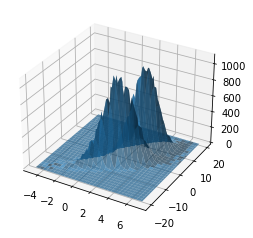

In [30]:
# Matplotlib up to 3.3
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, alpha=.7)

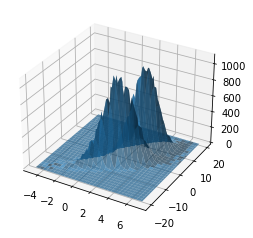

In [49]:
# Matplotlib from 3.4
fig = plt.figure()
ax =  fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, alpha=.7)

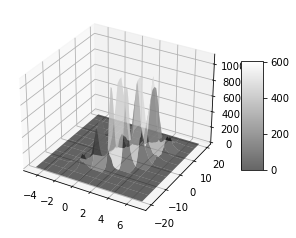

In [46]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.gray, rstride=6,cstride=6, lw=1, alpha=0.6)
ax.set_zlim(0, 1100.)
fig.colorbar(surf, shrink=0.5, aspect=5);

In [32]:
help(ax.plot_surface)

Help on method plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(X, Y, Z, *args, norm=None, vmin=None, vmax=None, lightsource=None, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a surface plot.
    
    By default it will be colored in shades of a solid color, but it also
    supports colormapping by supplying the *cmap* argument.
    
    .. note::
    
       The *rcount* and *ccount* kwargs, which both default to 50,
       determine the maximum number of samples used in each direction.  If
       the input data is larger, it will be downsampled (by slicing) to
       these numbers of points.
    
    .. note::
    
       To maximize rendering speed consider setting *rstride* and *cstride*
       to divisors of the number of rows minus 1 and columns minus 1
       respectively. For example, given 51 rows rstride can be any of the
       divisors of 50.
    
       Similarly, a setting of *rstride* and *cstride* equal to 1 (or
      

#### Contornos en 3D


/var/folders/b8/sx4v8rw56mv_mzsdqmfxz7z00000gn/T/ipykernel_86717/36241615.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


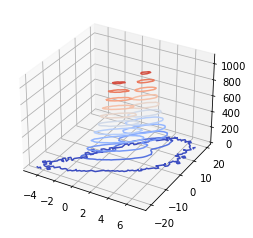

In [35]:
fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.contour(X, Y, Z,10, cmap=plt.cm.coolwarm)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.contour(X, Y, Z, 10, extend3d=True, cmap=plt.cm.coolwarm)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, lw=0, alpha=0.9, cmap=plt.cm.Blues)
cset = ax.contour(X, Y, Z, zdir='z', offset=1300, cmap=plt.cm.YlOrRd_r)
cset = ax.contour(X, Y, Z, zdir='x', offset=10, cmap=plt.cm.Oranges)
cset = ax.contour(X, Y, Z, zdir='y', offset=-30, cmap=plt.cm.Reds)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([0, 500, 1000]);



Veamos otro ejemplo. Modifiquemos el gráfico anterior para llenar los contornos laterales, utilizando la función `contourf()` en lugar de `contour()`

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, lw=0, alpha=0.6, cmap=plt.cm.Blues)
cset = ax.contour(X, Y, Z, zdir='z', offset=1300, cmap=plt.cm.YlOrRd_r)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-5, cmap=plt.cm.Oranges)
cset = ax.contourf(X, Y, Z, zdir='y', offset=-30, cmap=plt.cm.Reds)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([0, 500, 1000]);



#### Gráficos de campos vectoriales

Para realizar gráficos de campos (de velocidades, fuerzas, etc) podemos utilizar la función `quiver()`, que grafica flechas en cada punto, con una dirección y longitud dada


/var/folders/b8/sx4v8rw56mv_mzsdqmfxz7z00000gn/T/ipykernel_87973/3266001979.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


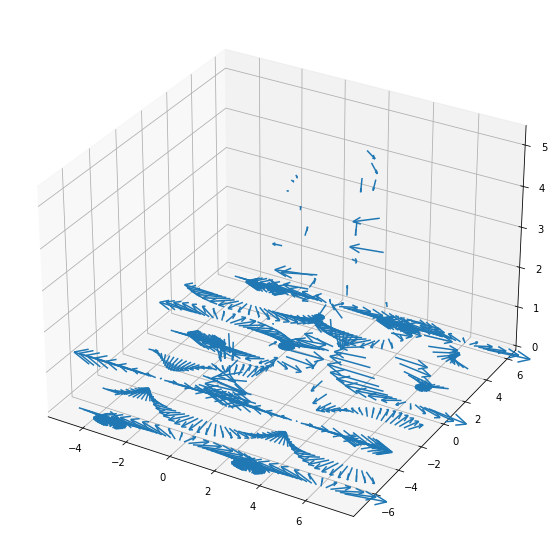

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
d=8
x =  X[::d]
y =  Y[::d]/3
z =  Z[::d]/200
# Creamos las direcciones para cada punto
u = 5*np.sin(x) * np.cos(y) * np.cos(z)
v = - 2* np.cos( x) * np.sin( y) * np.cos(z)
w = np.cos(x) * np.cos(y) * np.sin(z)

ax.quiver(x, y, z, u, v, w, length=0.5, arrow_length_ratio=0.3);


Veamos un ejemplo de la documentación de **Matplotlib**

/var/folders/b8/sx4v8rw56mv_mzsdqmfxz7z00000gn/T/ipykernel_87973/2540687272.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


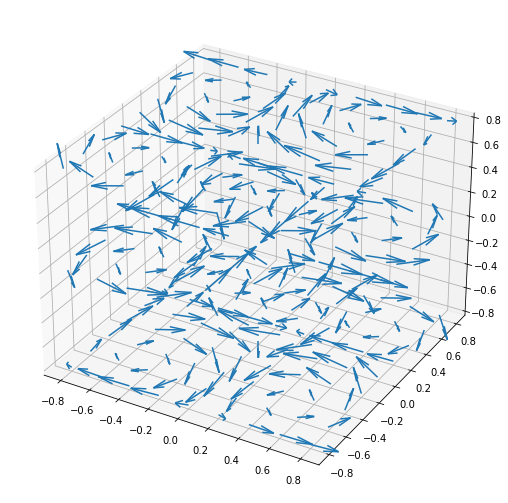

In [8]:

fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.3, arrow_length_ratio=0.5);

Más información sobre este tipo de gráficos en http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html